Problema 1

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-whitegrid')

Definiendo $u=\frac{d\theta}{dt}$, tenemos que $u'=-\frac{g}{l}\sin{\theta}$. 

Por lo cual se reduce el problema a dos ecuaciones diferenciales de primer orden.

In [92]:
#condiciones iniciales y constantes#
l=1.
a=9.81
t0=0
tf=10
N=10000
h=abs(t0-tf/N)


In [93]:


def vector_ceros(dimension):
    M=[]
    while len(M) <dimension:
        M.append(0.0)
    return M    

u1=vector_tiempo(N)
y1=vector_tiempo(N)
t1=vector_tiempo(N)
y1[0]=0.39

def f1(y1): 
    return -(a/l)*np.sin(y1)

def g1(u1):
    return u1

for i in range(N-1):
    u1[i+1]=u1[i]+h*f1(y1[i])
    y1[i+1]=y1[i]+h*g1(u1[i])
    t1[i+1]=t1[i]+h
    


        



[]
[]
[]


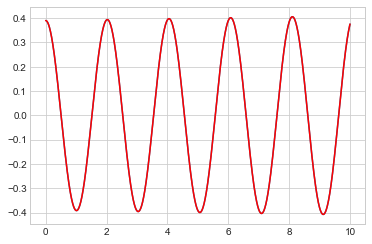

In [94]:

u2=np.zeros(N, dtype=float)
y2=np.zeros(N, dtype=float)
t2=np.zeros(N, dtype=float)
y2[0]=0.39

#método de euler de las dos ecuaciones de manera simultanea#
def f2(y2): 
    return -(a/l)*np.sin(y2)

def g2(u2):
    return u2

for i in range(N-1):
    u2[i+1]=u2[i]+h*f2(y2[i])
    y2[i+1]=y2[i]+h*g2(u2[i])
    t2[i+1]=t2[i]+h
    
plt.plot(t2,y2)
plt.plot(t2,y1, 'r')
plt.show()